# Heart Failure Prediction

- Heart Failure Prediction 데이터셋 (출처 : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)
- 파일의 각 컬럼
```
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
```

<최종 목표>
- 의료 데이터와 그 분석에 대한 이해
- 데이터 시각화를 통한 인사이트 습득 방법의 이해
- Scikit-learn 기반의 모델 학습 방법 습득
- Classification 모델의 학습과 평가 방법 이해

## 1. 데이터 로드 및 기본 탐색 (EDA) 및 시각화

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("/content/drive/MyDrive/heart_failure/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [71]:
# 기본 정보 확인
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
             

- 12개 feature
- float, int

In [72]:
# 결측치 확인
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


### 1-1) 연속형 변수 분석

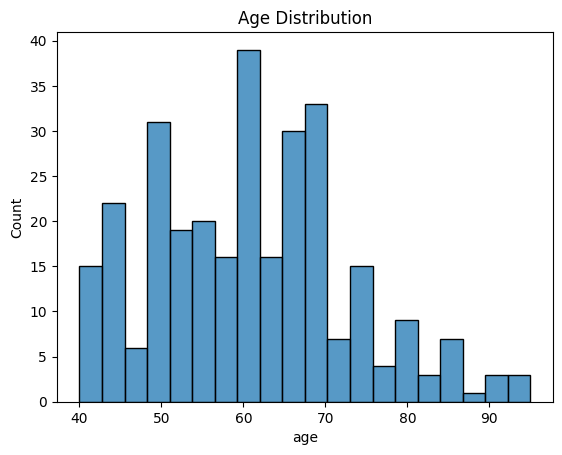

In [73]:
# age
df['age'] = df['age'].astype(int)

sns.histplot(df['age'], bins=20)
plt.title("Age Distribution")
plt.show()

(1) Age (나이)
- 40대부터 90대까지 환자가 분포.
- 60~70대 환자가 가장 많음 → 심부전 위험군이 중장년층에 집중된 가능성

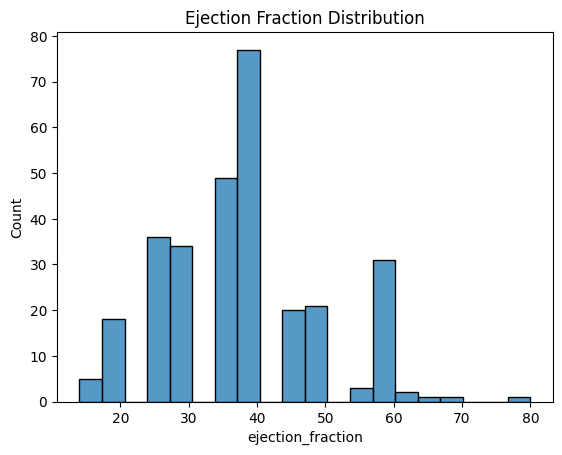

In [74]:
# ejection fraction 박출계수
sns.histplot(df['ejection_fraction'], bins=20)
plt.title("Ejection Fraction Distribution")
plt.show()

(2) Ejection Fraction (박출계수, 심장의 펌프 기능)
- 20~70% 범위에 분포.
- 대부분 30~40% 근처에 몰려 있음 → 심부전 환자는 일반적으로 박출계수가 낮음


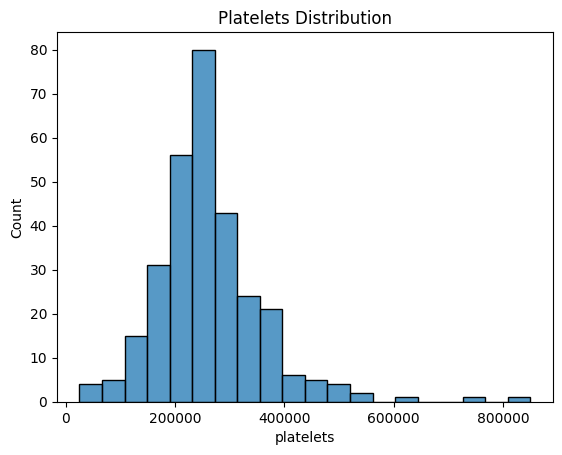

In [75]:
# platelet 혈소판 수
df['platelets'].astype(int)
sns.histplot(df['platelets'], bins=20)
plt.title("Platelets Distribution")
plt.show()

(3) Platelets (혈소판 수치)
- 대부분 10~40만 사이, 일부 이상치 존재
- 분포가 넓지만 큰 변동 없이 퍼져 있음

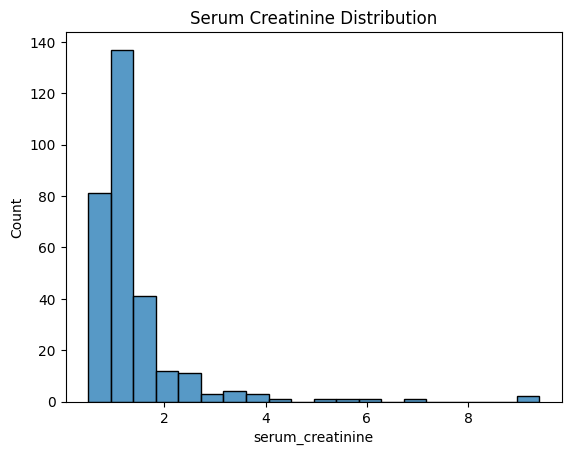

In [76]:
# serum_creatini 혈중 크레아틴 레벨
df['serum_creatinine'].astype(int)
sns.histplot(df['serum_creatinine'], bins=20)
plt.title("Serum Creatinine Distribution")
plt.show()

(4) Serum Creatinine (혈중 크레아티닌)
- 09 범위이지만 **02 근처에 집중**
- 일부 이상치(5~9)가 보임 → 신장 기능이 약한 일부 환자가 존재할 가능성

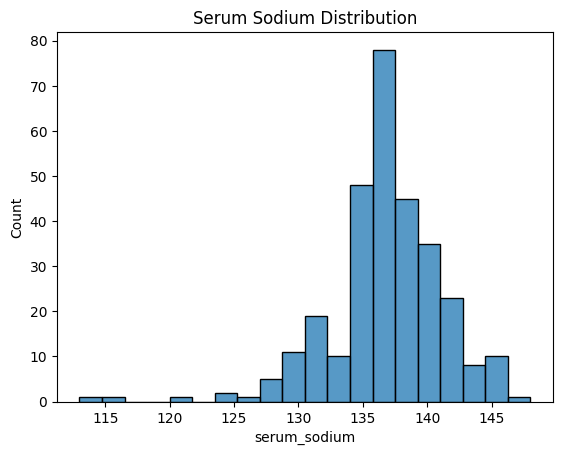

In [77]:
# serum_sodium 혈중 나트륨
sns.histplot(df['serum_sodium'], bins=20)
plt.title("Serum Sodium Distribution")
plt.show()

(5) Serum Sodium (혈중 나트륨)
- 120~145 사이에 분포, 정규분포와 유사한 형태
- 대부분 130~140 사이에 있음 → 정상 범위 안에 있는 환자가 많음


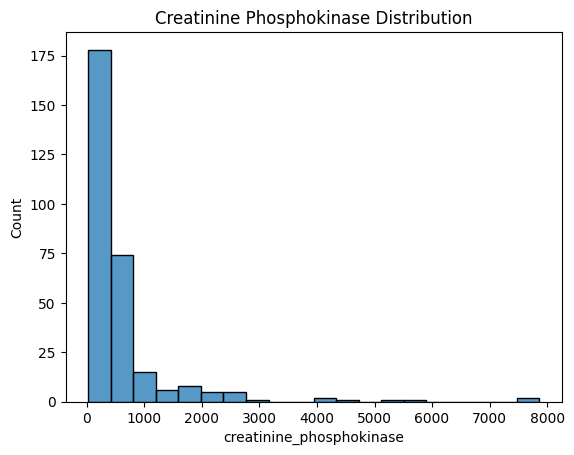

In [78]:
# creatinine_phosphokinase 심장 효소
sns.histplot(df['creatinine_phosphokinase'], bins=20)
plt.title("Creatinine Phosphokinase Distribution")
plt.show()

(6) Creatinine Phosphokinase (CPK, 심장 효소)
- 0~7500까지 넓게 분포, 하지만 대부분 500 이하
- 일부 이상치가 보임 → 심부전 환자 중 일부에서 급격한 효소 상승이 관찰될 가능성

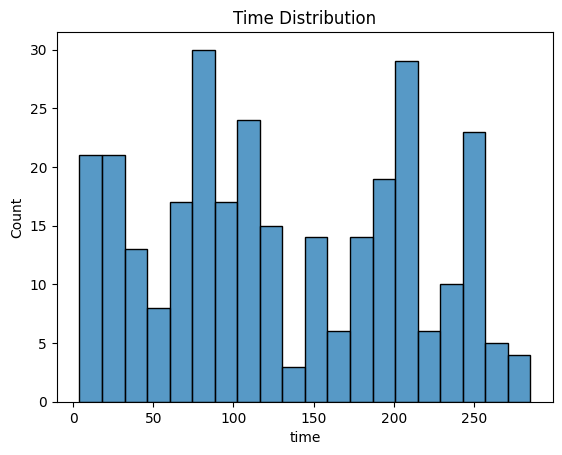

In [79]:
# time 관찰 기간
sns.histplot(df['time'], bins=20)
plt.title("Time Distribution")
plt.show()

(7) Time (관찰 기간)
- 0~300일까지 넓게 퍼져 있음
- 특정한 패턴 없이 비교적 균등 분포

### 1-2) 범주형 변수 분석

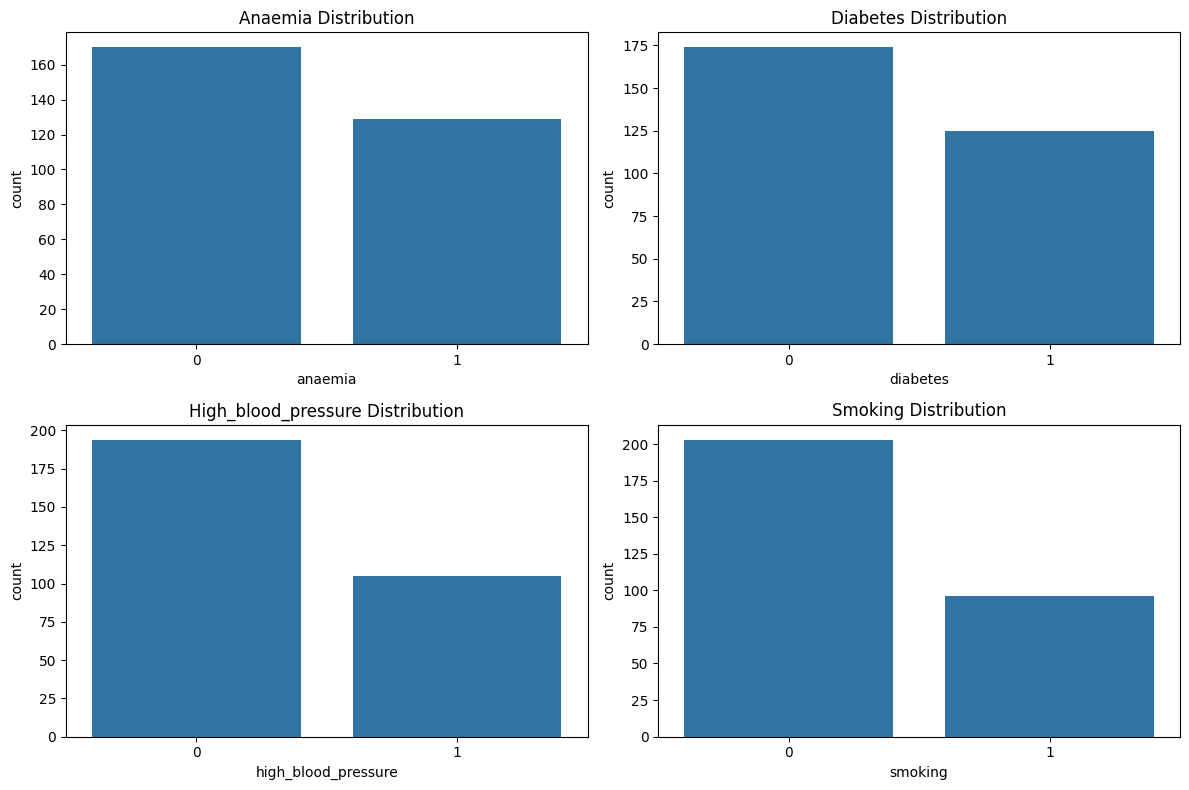

In [80]:
# 빈혈(anaemia), 당뇨(diabetes), 고혈압(high_blood_pressure), 흡연(smoking) 분포 시각화
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "smoking"]

plt.figure(figsize=(12, 8))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)  # 2x2 서브플롯
    sns.countplot(x=feature, data=df)
    plt.title(f"{feature.capitalize()} Distribution")

plt.tight_layout()
plt.show()

(1) Anaemia (빈혈), Diabetes (당뇨), High Blood Pressure (고혈압), Smoking (흡연)
- 모두 0과 1의 이진 분포
- 각 변수의 비율을 따로 확인해봐야 하지만, 대략적으로 환자 그룹별 특정 질환의 분포를 분석할 필요가 있음

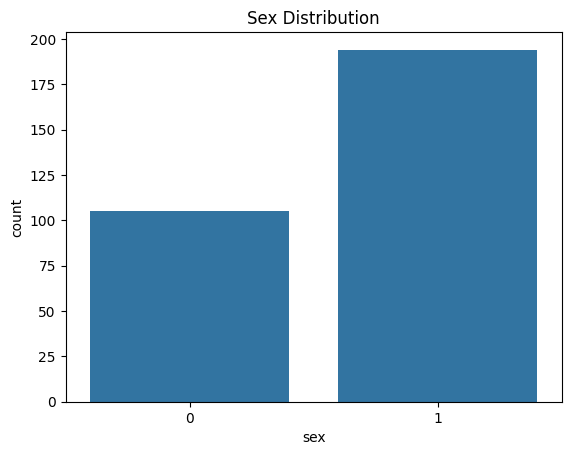

In [81]:
# sex 성별
sns.countplot(x='sex', data=df)
plt.title("Sex Distribution")
plt.show()

(2) Sex (성별)
- 0(여성)과 1(남성)으로 구분됨
- 어느 성별이 더 많은지 따로 시각화하면 좋을 듯

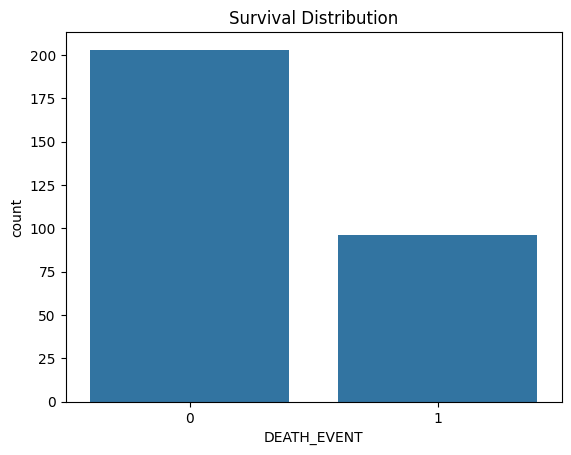

In [82]:
# 사망 여부 분포 확인
sns.countplot(x='DEATH_EVENT', data=df)
plt.title("Survival Distribution")
plt.show()

(3) DEATH_EVENT (사망 여부)
- 0(생존)이 더 많아 보임
- 사망자의 비율을 따로 확인하면 모델 성능 평가에도 도움될 것

### 1-3) 이상치 탐색

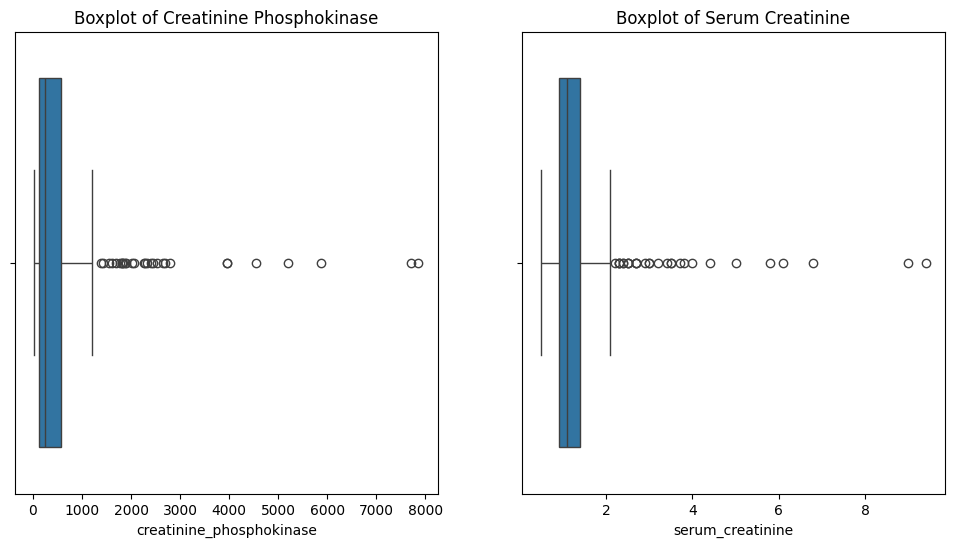

In [83]:
# Boxplot을 활용한 이상치 탐색
plt.figure(figsize=(12, 6))

# Creatinine Phosphokinase (CPK)
plt.subplot(1, 2, 1)
sns.boxplot(x=df["creatinine_phosphokinase"])
plt.title("Boxplot of Creatinine Phosphokinase")

# Serum Creatinine (혈중 크레아티닌)
plt.subplot(1, 2, 2)
sns.boxplot(x=df["serum_creatinine"])
plt.title("Boxplot of Serum Creatinine")

plt.show()

- CPK (크레아틴 키나제)
    - 일부 환자의 수치가 5000~7000 이상으로 매우 높음
    - 심근경색, 근육 손상 등의 경우 CPK 수치가 급격히 상승할 수 있음
    - → 이 수치가 중요한 임상적 의미를 가질 가능성이 있음
- Serum Creatinine (혈중 크레아티닌)
    - 대부분 02 근처에 있지만, 일부 **59 이상까지 상승**.
    - 신장 기능 저하(신부전) 환자에서 혈중 크레아티닌이 높게 나타날 수 있음
    - → 이 값도 중요할 가능성이 높아 이상치로 무조건 제거하면 안 될 수도 있음

1.	이상치를 제거할 것인가? (IQR을 활용해 이상치를 제거)
2.	로그 변환으로 완화할 것인가? (log1p 변환 적용)
3.	그대로 둘 것인가? (의료적 중요성이 있을 경우 유지)

2, 3번 고민, 모델 학습 후 성능을 비교해보고 결정

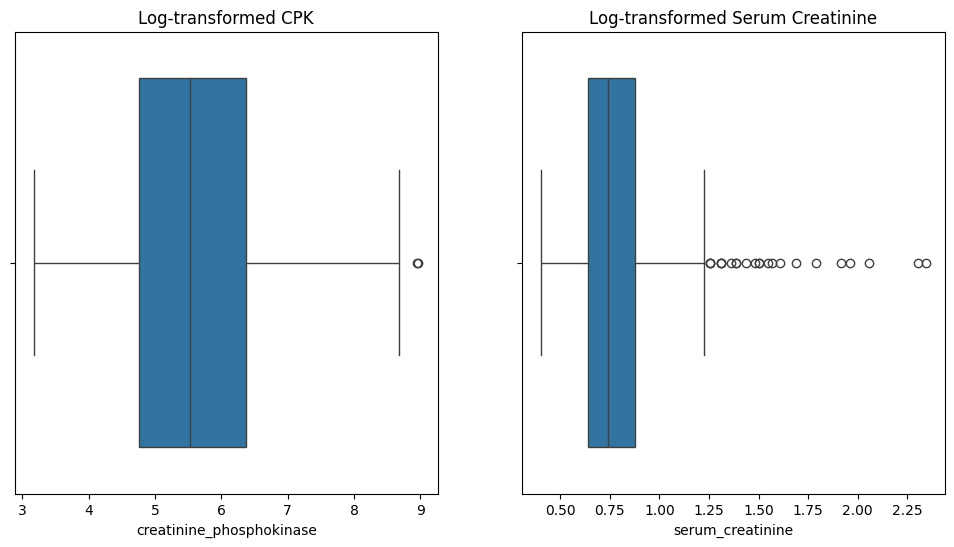

In [84]:
# 2번 로그 변환

df["creatinine_phosphokinase"] = np.log1p(df["creatinine_phosphokinase"])  # log(1 + x) 변환
df["serum_creatinine"] = np.log1p(df["serum_creatinine"])

# 변환 후 Boxplot 확인
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["creatinine_phosphokinase"])
plt.title("Log-transformed CPK")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["serum_creatinine"])
plt.title("Log-transformed Serum Creatinine")

plt.show()

### 1-4) 사망 여부에 따른 연속형 변수 평균 차이 분석

                               Survived           Died
age                           58.758621      65.208333
ejection_fraction             40.266010      33.468750
creatinine_phosphokinase       5.640934       5.718336
serum_creatinine               0.753146       0.964625
serum_sodium                 137.216749     135.375000
platelets                 266657.489901  256381.044792
time                         158.339901      70.885417


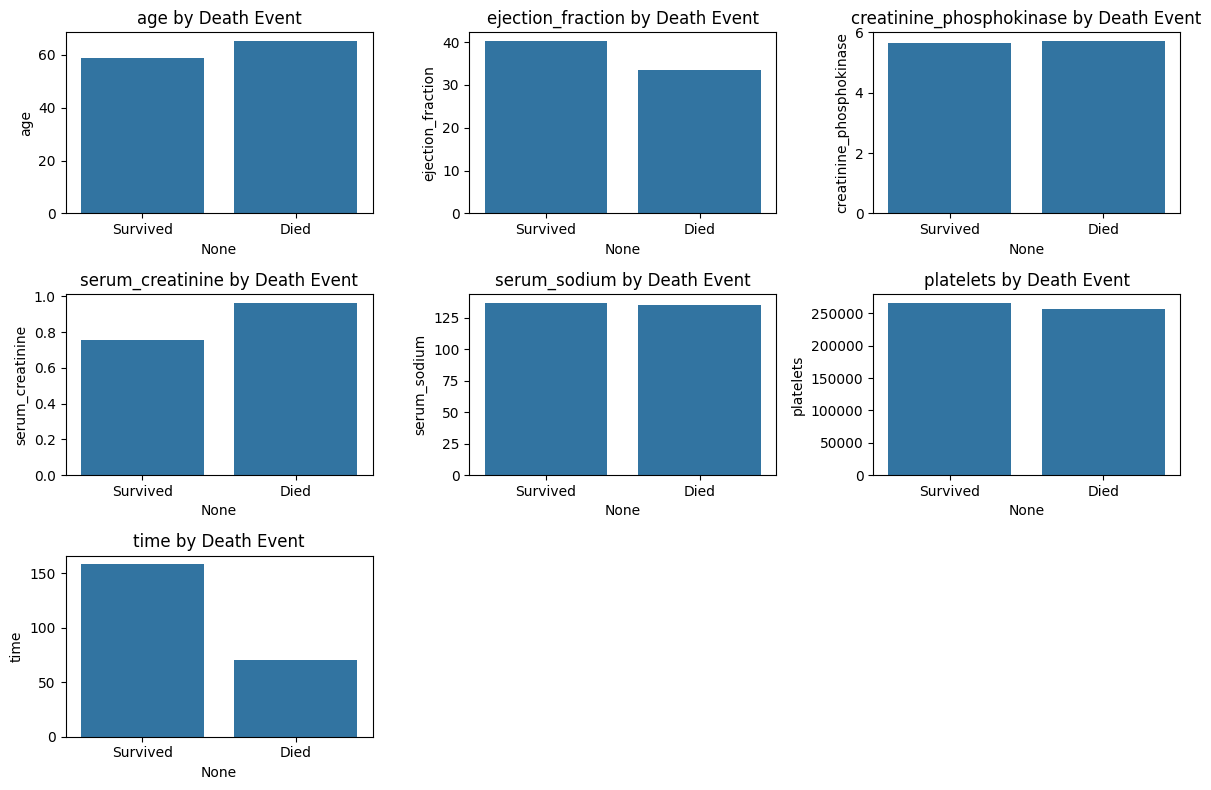

In [86]:
# 연속형 변수 리스트
continuous_features = ["age", "ejection_fraction", "creatinine_phosphokinase",
                       "serum_creatinine", "serum_sodium", "platelets", "time"]

# 사망 여부(0: 생존, 1: 사망)에 따른 평균 차이 분석
death_comparison = df.groupby("DEATH_EVENT")[continuous_features].mean().T
death_comparison.columns = ["Survived", "Died"]  # 컬럼명 변경
print(death_comparison)

# 개별 변수 플롯
plt.figure(figsize=(12, 8))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=death_comparison.columns, y=death_comparison.loc[feature])
    plt.title(f"{feature} by Death Event")

plt.tight_layout()
plt.show()

사망 가능성이 높은 변수:
- 나이(Age) → 나이가 많을수록 사망 확률 증가
- 박출계수(Ejection Fraction) → 낮을수록 사망 위험 증가
- 혈중 크레아티닌(Serum Creatinine) → 높을수록 신장 기능 저하로 사망 위험 증가
- 관찰 기간(Time) → 짧을수록 사망 가능성이 높음

큰 영향이 없어 보이는 변수:
- CPK (Creatinine Phosphokinase)
- 혈소판 (Platelets)
- 혈중 나트륨 (Serum Sodium)

### 1-5) 범주형 변수에 따른 사망률 차이 분석

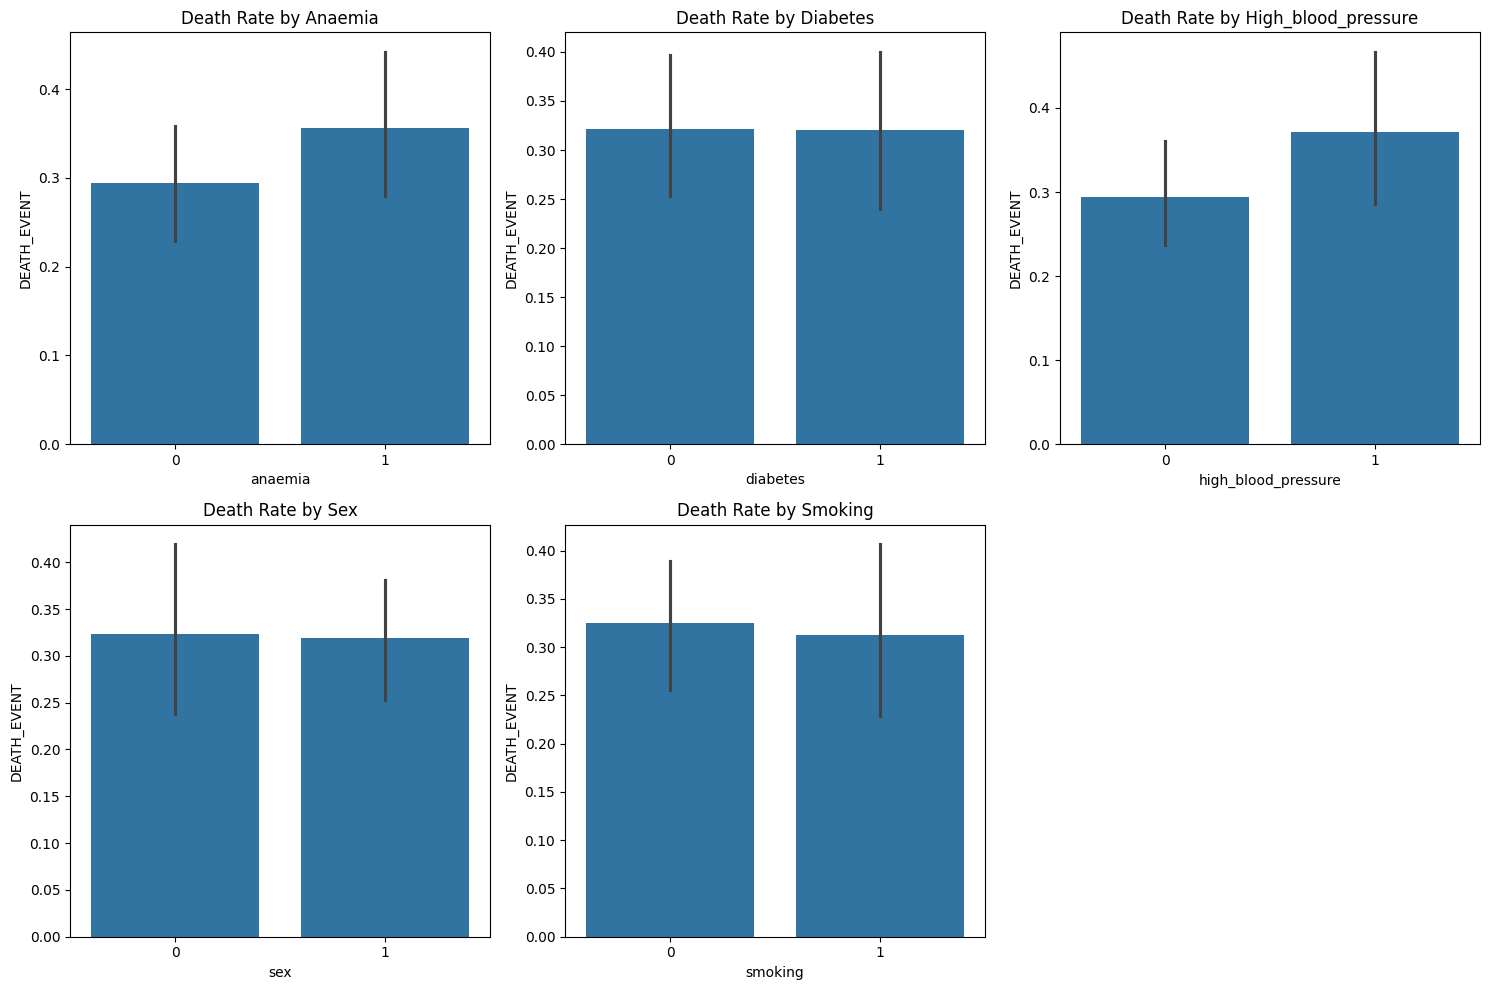

In [87]:
# 범주형 변수 리스트
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

# 각 범주별 사망률 비교
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=feature, y="DEATH_EVENT", data=df)
    plt.title(f"Death Rate by {feature.capitalize()}")

plt.tight_layout()
plt.show()

상대적으로 사망률에 영향을 줄 가능성이 있는 변수:
- Anaemia (빈혈) → 빈혈 환자의 사망률이 약간 높아 보임
- High Blood Pressure (고혈압) → 고혈압 환자의 사망률이 조금 더 높음

사망률과 큰 차이를 보이지 않는 변수:
- Diabetes (당뇨)
- Sex (성별)
- Smoking (흡연)

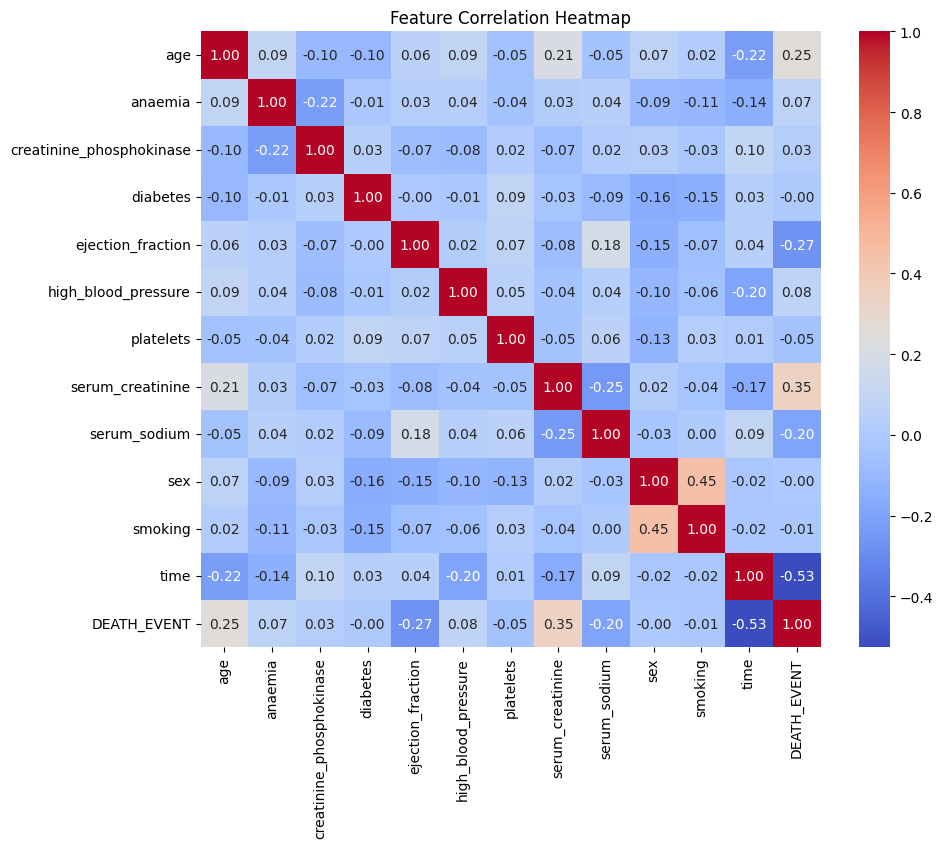

In [88]:
# 상관 행렬 (Heatmap)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

- 상관계수는 -1(강한 음의 상관관계) ~ 1(강한 양의 상관관계)
- 양수(+) → 값이 증가할수록 사망 가능성이 증가
- 음수(-) → 값이 증가할수록 사망 가능성이 감소

1.	사망률과 강한 연관이 있는 변수
- 🔻 관찰 기간(Time, -0.53) → 짧을수록 사망 확률 높음
- 🔻 박출계수(Ejection Fraction, -0.27) → 낮을수록 심장 기능 저하 → 사망 위험 증가
- 🔺 혈중 크레아티닌(Serum Creatinine, +0.35) → 신장 기능 저하 → 사망 위험 증가
- 🔺 나이(Age, +0.25) → 연령이 높을수록 사망 위험 증가
2.	사망률과 관련이 적거나 없는 변수
- 흡연(Smoking) → DEATH_EVENT과 거의 관련 없음
- 당뇨(Diabetes) → 상관계수 거의 0 (당뇨가 심부전 사망과 직접적인 연관 없음)
- 혈소판(Platelets) → 상관관계 없음

## 2. 데이터 전처리 및 분할

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
# 사용하지 않을 변수 제거 (사망률과 관련성이 낮은 변수 제거)
drop_cols = ["sex", "smoking", "diabetes", "platelets"]
df_model = df.drop(columns=drop_cols)

# X, y 정의
X = df_model.drop(columns=['DEATH_EVENT'])  # 입력 변수
y = df_model['DEATH_EVENT']  # 목표 변수 (사망 여부)

# 데이터 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [92]:
# 연속형 변수 표준화
scaler = StandardScaler()
num_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

- 중요도가 낮은 변수(sex, smoking, diabetes, platelets)를 제거
- 데이터 분할 → train_test_split(80:20 비율)
- 연속형 변수(age, ejection_fraction, serum_creatinine 등)를 표준화(Standardization) 처리

## 3. 분류 모델 학습 및 평가

- 4개 모델 비교: Logistic Regression, Random Forest, Decision Tree, XGBoost
- 모델 성능 평가:
    - 정확도(Accuracy)
    - ROC-AUC 점수 (이진 분류에서 중요한 지표)
    - 정밀도, 재현율, F1-score

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [94]:
# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"===== {name} =====")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")

===== Logistic Regression =====
Accuracy: 0.8167
ROC-AUC: 0.7529
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



===== Random Forest =====
Accuracy: 0.8000
ROC-AUC: 0.7407
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.73      0.58      0.65        19

    accuracy                           0.80        60
   macro avg       0.78      0.74      0.75        60
weighted avg       0.79      0.80      0.79        60



===== Decision Tree =====
Accuracy: 0.7833
ROC-AUC: 0.7285
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.69      0.58      0.63       

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


===== XGBoost =====
Accuracy: 0.8167
ROC-AUC: 0.7529
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60





모델별 성능 비교


|모델|정확도 (Accuracy)|ROC-AUC|재현율 (Recall, 사망 예측)|
|---|---|---|---|
|Logistic Regression|0.8167|0.7529|	0.58|
|Random Forest|0.8000|0.7407|0.58|
|Decision Tree|0.7833|0.7285|0.58|
|XGBoost|0.8167|0.7529|0.58|




- Logistic Regression과 XGBoost가 가장 높은 정확도(81.67%)와 ROC-AUC(0.7529)를 기록
- Random Forest와 Decision Tree는 성능이 상대적으로 낮음
- 하지만 모든 모델에서 재현율(Recall)이 0.58 정도로 낮음 → 사망 환자를 잘 예측하지 못하고 있음

문제점 및 개선 방향
- 주요 문제: 모델이 사망 환자(1)를 잘 예측하지 못함 (Recall=0.58)
- 모든 모델의 Recall(재현율)이 낮음 → 즉, 실제 사망한 환자 중 일부를 "생존"으로 잘못 예측하고 있음
- 심부전 예측에서는 사망 환자를 놓치는 것이 더 치명적이므로, Recall을 높이는 것이 중요


## 4. 하이퍼파라미터 최적화 (XGBoost, Randomized Search)

In [95]:
from sklearn.model_selection import RandomizedSearchCV

# XGBoost 하이퍼파라미터 튜닝
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:21:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, verbose=2)

In [96]:
# 최적 모델 평가
best_xgb = xgb_random.best_estimator_
y_pred_best = best_xgb.predict(X_test)

print(f"Optimized XGBoost Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Optimized XGBoost ROC-AUC: {roc_auc_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Optimized XGBoost Accuracy: 0.8500
Optimized XGBoost ROC-AUC: 0.7914
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



성능 비교

|모델|Accuracy|ROC-AUC|Recall(사망 환자 예측율)|F1-score|
|---|---|---|---|---|
|기본 XGBoost|81.67%|	0.7529|	0.58|	0.67|
|최적화 XGBoost|85.00%|	0.7914|	0.63|	0.73|

개선된 점
- Accuracy(정확도): 85.00% (기존 81.67% → 85.00%로 향상), 모델이 더 정밀해짐
- ROC-AUC: 0.7914 (기존 0.7529 → 0.7914로 상승), 사망 여부 예측의 구별력 향상
- Recall(재현율, 사망 환자 예측률): 0.58 → 0.63로 증가, 사망 환자를 더 잘 예측하게 됨

남은 문제점
- 여전히 recall이 낮음, 높이면 사망 환자를 놓칠 확률을 줄일 수 있음
- 해결을 위해 클래스 불균형 조정(SMOTE) 또는 임계값 조정(Threshold Tuning) 적용해 볼 수 있음


## 5. 추가 개선
1. SMOTE를 활용한 데이터 불균형 해결 (Recall 개선)
2. 임계값(Threshold) 조정으로 Recall 개선

### 5-1) SMOTE를 활용한 데이터 불균형 해결 (Recall 개선)
- 사망 환자(클래스 1)의 데이터를 증강하여 모델이 균형 있게 학습하도록 도움

In [97]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 최적화된 XGBoost 모델 다시 학습
best_xgb.fit(X_train_resampled, y_train_resampled)
y_pred_smote = best_xgb.predict(X_test)

print(f"SMOTE XGBoost Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"SMOTE XGBoost ROC-AUC: {roc_auc_score(y_test, y_pred_smote):.4f}")
print(classification_report(y_test, y_pred_smote))

SMOTE XGBoost Accuracy: 0.8333
SMOTE XGBoost ROC-AUC: 0.7933
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:29:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 5-2) 임계값(Threshold) 조정으로 Recall 개선
- 기본적으로 임계값이 0.5이지만, Recall을 더 높이려면 0.4~0.45 정도로 낮출 수도 있음
- 사망 환자를 더 많이 예측하도록 유도 가능

In [98]:
from sklearn.metrics import precision_recall_curve

# 예측 확률 가져오기
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Precision-Recall Curve 확인
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# 최적 임계값 찾기 (재현율을 높이면서 정밀도도 고려)
best_threshold = thresholds[np.argmax(recall - precision)]

# 새로운 임계값 적용
y_pred_threshold = (y_pred_proba >= best_threshold).astype(int)

print(f"Threshold-tuned XGBoost Accuracy: {accuracy_score(y_test, y_pred_threshold):.4f}")
print(f"Threshold-tuned XGBoost ROC-AUC: {roc_auc_score(y_test, y_pred_threshold):.4f}")
print(classification_report(y_test, y_pred_threshold))


Threshold-tuned XGBoost Accuracy: 0.3167
Threshold-tuned XGBoost ROC-AUC: 0.5000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.32      1.00      0.48        19

    accuracy                           0.32        60
   macro avg       0.16      0.50      0.24        60
weighted avg       0.10      0.32      0.15        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


가장 효과적인 방법 ?

|모델	|Accuracy	|ROC-AUC	|Recall(사망 환자 예측)	|F1-score|
|---|---|---|---|---|
|최적화 XGBoost|	0.8500|	0.7914|	0.63|	0.73|
|SMOTE XGBoost|	0.8333	|0.7933	|0.68	|0.72|
|임계값 조정 XGBoost|	0.3167|	0.5000|	1.00|	0.48|

- SMOTE 적용 XGBoost : 현재까지 가장 균형 잡힌 성능을 보임

    - 사망 환자 예측률(Recall) 증가 → 0.63 → 0.68로 향상됨
    - ROC-AUC도 개선됨
    - 정확도도 83.33%로 유지됨

- 임계값 조정은 현재 상태로는 실패

    - 모든 환자를 사망(1)으로 예측하는 문제 발생

결론

- 최적의 모델: SMOTE 적용한 XGBoost 모델


```
SMOTE XGBoost Accuracy: 0.8333
SMOTE XGBoost ROC-AUC: 0.7933
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60

```

